# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [9]:
#import libraries
import torch
import numpy 
import matplotlib.pyplot as plt

%matplotlib inline

In [27]:
from torchvision import datasets, transforms

#Define a transform to normalize the data
transform=transforms.Compose([transforms.ToTensor(),
                             transforms.Normalize((0.5,),(0.5,))])

#Load the training and testing Dataset
trainset=datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',download=True,train=True,transform=transform)
testset=datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',download=True,train=False,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)
testloader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


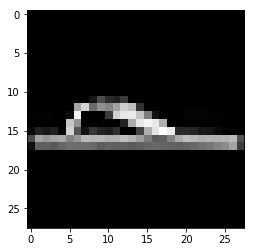

In [28]:
images, labels =next(iter(trainloader))
print(type(images))
print(images.shape)
print(labels.shape)
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

## Building the network

As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. Include at least one hidden layer. Lets use ReLU activations for the layers and to return the logits or log-softmax from the forward pass.

In [29]:
from torch import nn, optim
import torch.nn.functional as F

In [30]:
class Fashion(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1=nn.Linear(784,256)
        self.fc2=nn.Linear(256,128)
        self.fc3=nn.Linear(128,64)
        self.fc4=nn.Linear(64,10)
    
    
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        x=F.log_softmax(self.fc4(x),dim=1)
        
        return x
        

In [31]:
model= Fashion()
model

Fashion(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

# Train the network

Lets create the network and train it. Define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) (something like `nn.CrossEntropyLoss` or `nn.NLLLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

The training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), we should be able to get the low training loss.

In [32]:
criterion=nn.NLLLoss()
optimizer=optim.Adam(model.parameters(),lr=0.03)

In [37]:
epochs=5

for epoch in range(epochs):
    running_loss=0
    for images, labels in trainloader:
        image=images.view(images.shape[0],-1)
        
        optimizer.zero_grad()
        output=model(image)
        loss=criterion(output,labels)
        loss.backward()
        optimizer.step()
        
        running_loss+=loss.item()
    
    print(f"Training_loss,{running_loss/len(trainloader)}")

Training_loss,0.8677888147231104
Training_loss,0.8950522363122339
Training_loss,1.0263383214089916
Training_loss,0.9785857567909175
Training_loss,1.1941959237747355


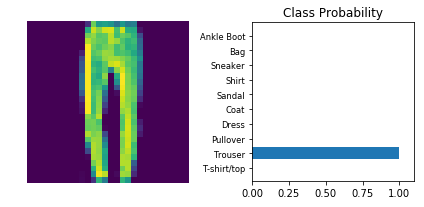

In [44]:
images, labesl =next(iter(trainloader))

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
img = images[0].view(1, 784)

# Forward pass through the network

logps = model.forward(img)
ps=torch.exp(logps)
ps=ps.data.numpy().squeeze()
fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
ax1.axis('off')
ax2.barh(numpy.arange(10), ps)
ax2.set_aspect(0.1)
ax2.set_yticks(numpy.arange(10))
ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)
plt.tight_layout()